In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('housing_rental_cleaned.csv')

In [20]:
df.head()
df.dtypes


house_rent          int64
house_location     object
house_type         object
no_bedrooms         int64
no_washrooms        int64
total_views         int64
house_town_name    object
house_area_name    object
dtype: object

In [21]:
# df1 = df.drop(columns= ['house_location','date_renewed','house_town_name','house_area_name','house_type'])
df1 = df

In [22]:
df1.shape

(1355, 8)

In [23]:
#removing outliers
df1 = df1[df1.no_bedrooms<=7]
df1 = df1[df1.no_washrooms<=7]
df1 = df1[df.house_area_name.str.contains("Dublin")]

c:\python27\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [24]:
df1.house_area_name.value_counts()

 Dublin 2      180
 Co. Dublin    167
 Dublin 4      162
 Dublin 8       90
 Dublin 1       81
 Dublin 6       67
 Dublin 18      67
 Dublin 3       45
 Dublin 7       45
 Dublin 9       36
 Dublin 14      33
 Dublin 15      28
 Dublin 12      25
 Dublin 22      18
 Dublin 24      18
 Dublin 13      18
 Dublin 6w      16
 Dublin 16      13
 Dublin 5        9
 Dublin 11       9
 Dublin 20       5
 Dublin 10       4
 Dublin 17       4
Name: house_area_name, dtype: int64

In [25]:
for i, rows in df1.iterrows():
#     rows.house_price = rows.house_price.replace(",","")
    df1.at[i,'house_area_name'] = df1.at[i,'house_area_name'].strip()
    df1.at[i,'house_type'] = df1.at[i,'house_type'].strip()

In [26]:
df1["house_area_name"] = df1["house_area_name"].str.replace("Dublin 6w","Dublin 6")

In [27]:
print(df1['house_type'].value_counts())

Apartment to Rent    765
House to Rent        346
Flat to Rent          29
Name: house_type, dtype: int64


In [28]:
df1.head()

house_rent                                     house_location  \
0        2200                  Ivy Terrace,Cork Street, Dublin 8   
1        1990            61 Anglesea Road, Ballsbridge, Dublin 4   
4        6500  Capital Dock, Sir John Rogerson's Quay, Grand ...   
5       10000  Penthouse 2001, Capital Dock Residence, SJR Qu...   
7        4400  Capital Dock, Sir John Rogerson's Quay, Grand ...   

          house_type  no_bedrooms  no_washrooms  total_views  \
0      House to Rent            2             1          462   
1  Apartment to Rent            1             1         6749   
4  Apartment to Rent            2             2         7929   
5  Apartment to Rent            2             3        11586   
7  Apartment to Rent            3             2        12112   

     house_town_name house_area_name  
0        Cork Street        Dublin 8  
1        Ballsbridge        Dublin 4  
4   Grand Canal Dock        Dublin 2  
5   Grand Canal Dock        Dublin 2  
7   Grand Canal Dock        Dublin 2

In [29]:
df1_encoded = df1.copy()

In [48]:
df1.house_type.unique()

array(['House to Rent', 'Apartment to Rent', 'Flat to Rent'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
# df1_encoded[df1_encoded.house_area_name == "Co. Dublin"]

In [32]:
label_make = LabelEncoder()

df1_encoded['area_code'] = label_make.fit_transform(df1['house_area_name'])
df1_encoded['town_code'] = label_make.fit_transform(df1['house_town_name'])
df1_encoded['house_type_code'] = label_make.fit_transform(df1['house_type'])

In [33]:
# print(df1_encoded['house_area_name'].value_counts())
df1_encoded.head()

house_rent                                     house_location  \
0        2200                  Ivy Terrace,Cork Street, Dublin 8   
1        1990            61 Anglesea Road, Ballsbridge, Dublin 4   
4        6500  Capital Dock, Sir John Rogerson's Quay, Grand ...   
5       10000  Penthouse 2001, Capital Dock Residence, SJR Qu...   
7        4400  Capital Dock, Sir John Rogerson's Quay, Grand ...   

          house_type  no_bedrooms  no_washrooms  total_views  \
0      House to Rent            2             1          462   
1  Apartment to Rent            1             1         6749   
4  Apartment to Rent            2             2         7929   
5  Apartment to Rent            2             3        11586   
7  Apartment to Rent            3             2        12112   

     house_town_name house_area_name  area_code  town_code  house_type_code  
0        Cork Street        Dublin 8         20        217                2  
1        Ballsbridge        Dublin 4         16         18                0  
4   Grand Canal Dock        Dublin 2         11         79                0  
5   Grand Canal Dock        Dublin 2         11         79                0  
7   Grand Canal Dock        Dublin 2         11         79                0

In [34]:
df1_encoded_test = df1_encoded.drop(columns= ['total_views','house_location','house_town_name','house_area_name','house_type'])
df1_encoded_test.head()

house_rent  no_bedrooms  no_washrooms  area_code  town_code  \
0        2200            2             1         20        217   
1        1990            1             1         16         18   
4        6500            2             2         11         79   
5       10000            2             3         11         79   
7        4400            3             2         11         79   

   house_type_code  
0                2  
1                0  
4                0  
5                0  
7                0

In [35]:
df1_encoded_test = df1_encoded_test[df1_encoded_test.house_rent<8000]
df1_encoded_test.house_rent.describe()

count    1122.000000
mean     2663.547237
std      1155.212694
min       600.000000
25%      1800.000000
50%      2360.000000
75%      3390.000000
max      7950.000000
Name: house_rent, dtype: float64

df1.

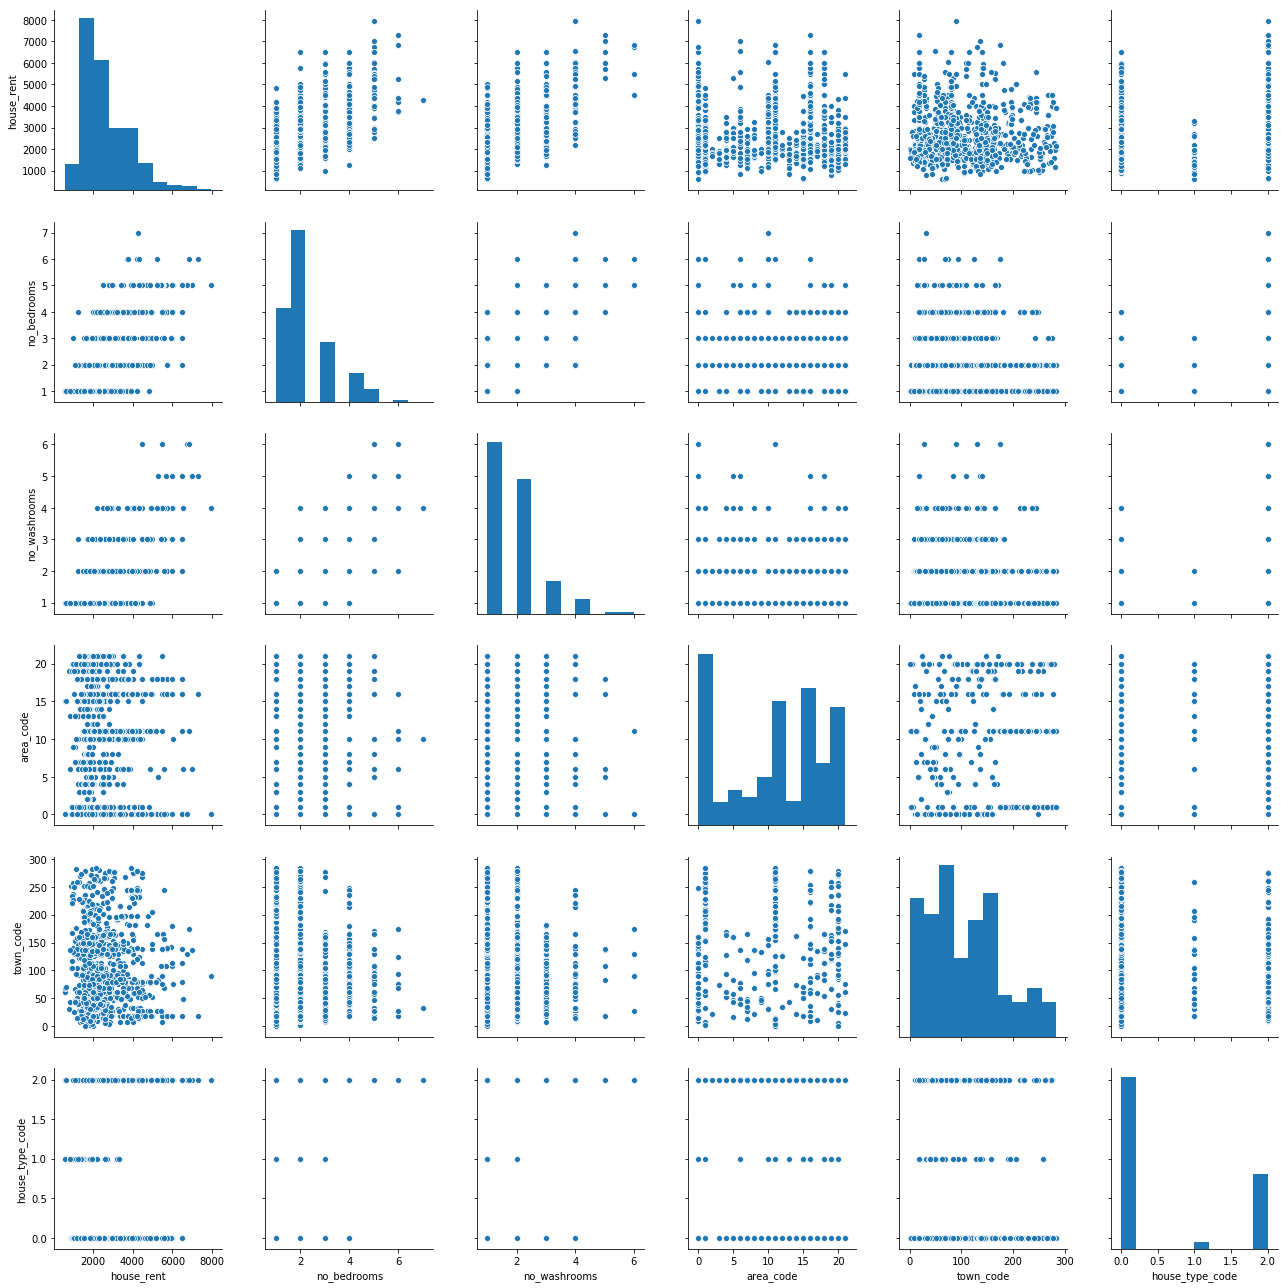

In [36]:
sns.pairplot(df1_encoded_test,height=3)
plt.tight_layout()

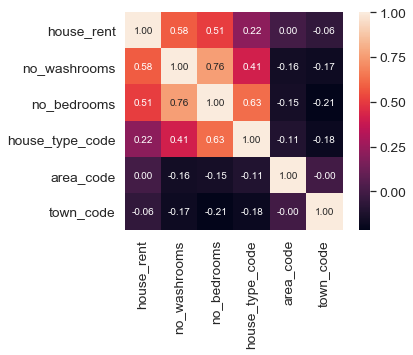

In [37]:
df1_encoded_test.shape
corrmat = df1_encoded_test.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'house_rent')['house_rent'].index
cm = np.corrcoef(df1_encoded[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [38]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

Most Correlated Features
0               house_rent
1             no_washrooms
2              no_bedrooms
3          house_type_code
4                area_code
5                town_code

In [39]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [40]:
prices = df1_encoded_test['house_rent']
features = df1_encoded_test.drop(columns = ['house_rent','town_code','town_code'],axis = 1)

In [47]:
features.head()

no_bedrooms  no_washrooms  area_code  house_type_code
0            2             1         20                2
1            1             1         16                0
4            2             2         11                0
7            3             2         11                0
8            1             1         11                0

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

# Training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    grid = grid.fit(X, y)

    return grid.best_estimator_

In [43]:
reg = fit_model(X_train, y_train)

print("max_depth is {} for the best model.".format(reg.get_params()['max_depth']))

max_depth is 9 for the best model.


In [44]:
#R Square value:
reg.score(X_train,y_train)

0.7463243177593777

In [45]:

X_train.head()

no_bedrooms  no_washrooms  area_code  house_type_code
1333            2             2         11                0
1062            2             2         17                0
238             3             2         10                0
1264            2             2         11                0
1348            1             1         15                0

In [46]:
new_input = [[2,1,11,0],
            [2,2,17,0],
             [2,2,11,0]]

for i, price in enumerate(reg.predict(new_input)):
    print("Predicted renting price for Client {}'s accomodation: ${:,.2f}".format(i+1, price))

Predicted renting price for Client 1's accomodation: $3,489.62
Predicted renting price for Client 2's accomodation: $1,877.67
Predicted renting price for Client 3's accomodation: $3,828.84
